In [1]:
"""
Auteur : Léa Montestier <numéro d'étudiant : 22206306> et Ming Wei ANG <numéro d'étudiant : 22106585>
Sujet : Projet d'ouverture master <Optimisation de portefeuille de Markowitz et étude du marché bousier Bulgarien>
Date : 10 Novembre 2022
Tuteur : AILLIOT Piere et ROUOT Jérémy
Université de Bretagne Occidentale 
Faculté des sciences et technique
L3 MIASHS 2022 -2023
"""

"\nAuteur : Léa Montestier <numéro d'étudiant : 22206306> et Ming Wei ANG <numéro d'étudiant : 22106585>\nSujet : Projet d'ouverture master <Optimisation de portefeuille de Markowitz et étude du marché bousier Bulgarien>\nDate : 10 Novembre 2022\nTuteur : AILLIOT Piere et ROUOT Jérémy\nUniversité de Bretagne Occidentale \nFaculté des sciences et technique\nL3 MIASHS 2022 -2023\n"

In [ ]:
"""Sujet 2 : Exemples academiques"""

'Sujet 2 : Exemples academiques'

In [1]:
## Importer les packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
"""Problème : Générer des exemples simples et un exemple complex et aléatoire pour simuler un marché boursier"""
"""Objectif : Apprendre comment l'optimisation de portefeuille est appliqué sur le marché"""
"""Remarque : ####____#### est le sign pour éxércuter manuallement pendant simuler le cas aléatoire"""

## CAS 1 ET 0
lis = pd.DataFrame([[1,2,3,4],[4,3,2,1]])

## CAS AVEC CORRELATION ET COVARIANCE POSITIVE 
#lis = pd.DataFrame([[1,2,3,4],[1,2,3,4]])
#lis = pd.DataFrame([[1,2,3,4],[2,3,4,5]])

## ENSUITE, LES CAS POUR COMPREND LA PREFÉRENCE DE LA MACHINE 
## CAS 1
#lis = pd.DataFrame([[1,2,3,4],[4,3,2,1],[1,7,5,9]])
#lis = pd.DataFrame([[1,2,3,4],[4,3,2,1],[5,7,6,9]])

## CAS 2
#lis = pd.DataFrame([[1,2,3,4],[4,3,2,1],[2,4,4.5,3]])

## CAS 3
#lis = pd.DataFrame([[1,2,3,4],[4,3,2,1],[2.5,2.5,2.5,2.5]])

#---------------------------

####____####
## Énlever le premier colonne de #
## CAS ALÉATOIRE 
## Nombre d'actifs
#n_actif = 5
### Nombre d'observation
#n_obs = 1000
## Liste de données
#lis = np.random.randn(n_actif, n_obs)


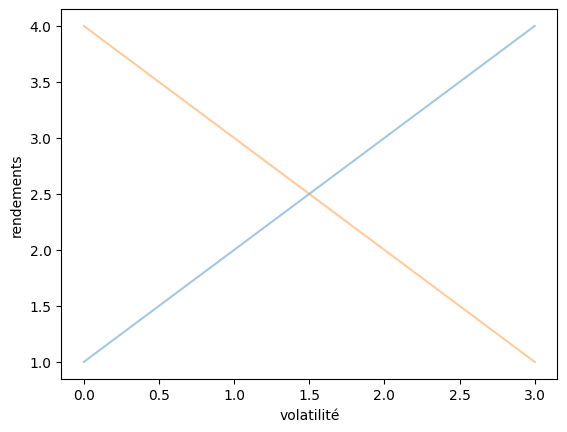

In [3]:
####____####
"""Problème : Visualiser les cas simulé"""

## Afficher le graphe de données
plt.xlabel('volatilité')
plt.ylabel('rendements')
plt.plot(lis.T, alpha=.4) #alpha : transparence

In [4]:
"""Problème : Calculer les rendements logarithmes"""
"""Objetif : Avoir des taux de rendements symétrique et logaritme fera perdre le moins information possible"""

#pct_change():calculer des taux de rendements simple
taux_rendement = np.array(lis.T.pct_change().apply(lambda x: np.log(1+x))) ####____#### Ajouter #
#taux_rendement = np.array(lis.T.apply(lambda x: np.log(1+x))) ####____#### Énlever #
taux_rendement = np.delete(taux_rendement,0,0)
print(taux_rendement)

#---------------------------

"""Problème : Utiliser 2 façons différentes pour calculer les variances et les écart-types"""
"""Objetif : Vérifier les variance et les écart-types sont correctes"""

## Variance
taux_rendement = pd.DataFrame(taux_rendement)
MoyAct1 = taux_rendement[0].mean()
print("moyennes de premier actif = ",MoyAct1)
sqd_TaRe = np.sum(taux_rendement[0].apply(lambda x: (x-MoyAct1)**2))
print("variance de premier actif = ",sqd_TaRe/(taux_rendement[0].count()-1))

VarAct1 = taux_rendement[0].var()
print("variance d'actif 0 = ",VarAct1)
VarAct2  = taux_rendement[1].var()
print("variance d'actif 1 = ",VarAct2)
VarAct = [taux_rendement[i].var() for i in range(len(taux_rendement.T))]
print("liste de variance = ",VarAct)

## Ecart-type(Volalité)
EcaTypeAct1 = taux_rendement[0].std()
print("ecart-type d'actif 0 = ",EcaTypeAct1)
EcaTypeAct2 = taux_rendement[1].std()
print("ecart-type d'actif 1 = ",EcaTypeAct2)
EcaTypeAct = [taux_rendement[i].std() for i in range(len(taux_rendement.T))]
print("liste de Ecart-type = ",EcaTypeAct)

[[ 0.69314718 -0.28768207]
 [ 0.40546511 -0.40546511]
 [ 0.28768207 -0.69314718]]
moyennes de premier actif =  0.4620981203732968
variance de premier actif =  0.04350596203195835
variance d'actif 0 =  0.04350596203195835
variance d'actif 1 =  0.043505962031958334
liste de variance =  [np.float64(0.04350596203195835), np.float64(0.043505962031958334)]
ecart-type d'actif 0 =  0.20858082853406817
ecart-type d'actif 1 =  0.20858082853406815
liste de Ecart-type =  [np.float64(0.20858082853406817), np.float64(0.20858082853406815)]


In [5]:
"""Problème : Utiliser 2 façons différentes pour calculer les covariances"""
"""Objetif : Vérifier les covariances sont correctes"""

## Covariance
DevAct1 = taux_rendement[0].apply(lambda x: x-MoyAct1)
DevAct2 = taux_rendement[1].apply(lambda x: x-taux_rendement[1].mean())

print((DevAct1*DevAct2).sum()/(DevAct2.count()-1))
CovAct = taux_rendement[0].cov(taux_rendement[1])
print(CovAct)

#---------------------------

"""Problème : Afficher la matrice de covariance"""

## Matrice de covariance
print(taux_rendement.cov())


0.03869501491462438
0.03869501491462438
          0         1
0  0.043506  0.038695
1  0.038695  0.043506


In [6]:
####____####
"""Problème : Générer des pondération aléatoire pour chaque actif"""
"""Objetif : Construire un portefeuille"""

## Pondération du capital pour chaque actif, la somme de pondération est égale à 1
def ponderation(n):
    k = [np.random.uniform(0,1) for i in range(n)]
    lis_pond = []
    for i in range(len(k)):
        lis_pond.append(k[i]/sum(k))
    return lis_pond


In [7]:
####____####
"""Problème : Construire un portefeuille avec des pondérations aléatoire"""
"""Objetif : Construire un échantillon de portefeuille avec des différentes pondérations"""

## Portefeuille aléatoire
def portefeuille(rendements):
    p_moy = np.asmatrix(np.mean(rendements,axis=1)) #matrice de moyenne de chaque ligne
    xpond = ponderation(rendements.shape[0]) #shape : dimension de matrice, ici [0]
                                                 #est la quantité de ligne de matrice
    x = np.asmatrix(xpond)
    sigma = np.asmatrix(np.cov(rendements)) #matrice de covariance

    R = x*p_moy.T #l'espérance de rendement
    V = np.sqrt(x*sigma*x.T) #la volatilité

    sharpeRatio = R/V

    if V>2:
        return portefeuille(rendements)
    return R, V, sharpeRatio, [xpond]

print(portefeuille(taux_rendement.T)) ####____#### Ajouter #
#print(portefeuille(lis)) ####____#### Énlever #

(matrix([[0.00524824]]), matrix([[0.20273332]]), matrix([[0.0258874]]), [[0.5056787057817248, 0.4943212942182751]])


In [9]:
####____####
"""Problème : Contruire un échantillon de portefeuille avec des différentes pondérations"""
"""Objetif : Avoir des espérance de rendements des différentes portefeuilles, des volatilités des différentes portefeuilles
                et des valeurs de Sharpe Ratio des différentes portefeuilles """

## Échantillon du portefeuille
n_portefeuilles = 1000
# R_esp, risq, SR, xpond = np.column_stack([ #constuite des colonne, ici nous aurons 4 colonnes
#     portefeuille(taux_rendement.T) ####____#### Ajouter #
#     #portefeuille(lis) ####____#### Énlever #
#     for i in range(n_portefeuilles)
# ])

R_esp, risq, SR, xpond = zip(*[portefeuille(taux_rendement.T) for i in range(n_portefeuilles)])


R_esp, risq, SR, xpond = np.array(R_esp).flatten(), np.array(risq).flatten(), np.array(SR).flatten(), np.array(xpond)


In [10]:
####____####
"""Problème : Visualiser l'échantillon de portefeuille"""

import plotly.graph_objects as go

Portefeuilles = go.Scatter(x = risq,y = R_esp,mode = "markers", marker = dict(size=12,
        color = SR, colorscale = "Viridis", showscale = True,line_width = 1,colorbar = dict(title = "Sharpe<br>Ratio")
        ),text = "portefeuille")

data = [Portefeuilles]

layout = go.Layout(title = "Echantillon de portefeuille", yaxis = dict(title = "Rendement"), xaxis = dict(title = "Volatilité"),
                    width = 800, height = 600, showlegend = False)

fig = go.Figure(data = data, layout = layout)

fig.show()

In [11]:
####____####
"""Problème : Chercher la volatilité minimum"""
"""Objetif : Comprendre la structure d'échantillon"""

## Chercher le minimum de la volatilité dans la graphe
minIndex = risq.argmin() 

print("La pondération du portefeuille avec volatilité minimum :",xpond[minIndex])
print("Le rendement du portefeuille avec volatilité minimum:", R_esp[minIndex])
print("L'ecart-type du portefeuille avec volatilité minimum :", risq[minIndex])
print("La valeur du Sharpe Ratio avec volatilité minimum :",SR[minIndex])


La pondération du portefeuille avec volatilité minimum : [[0.50003111 0.49996889]]
Le rendement du portefeuille avec volatilité minimum: 2.8752803841430863e-05
L'ecart-type du portefeuille avec volatilité minimum : 0.20273255407705107
La valeur du Sharpe Ratio avec volatilité minimum : 0.00014182627931823419


In [12]:
####_____####
"""Problème : Visualiser le point de volatilité minimum sur l'échantillon de portefeuille"""

## Le point noir
Portefeuilles = go.Scatter(x = risq,y = R_esp,mode = "markers", marker = dict(size=12,
        color = SR, colorscale = "Viridis", showscale = True,line_width = 1,colorbar = dict(title = "Sharpe<br>Ratio")
        ),text = "portefeuille")

Minimum_Volatilite = go.Scatter(x = np.array(risq[minIndex]), y = np.array(R_esp[minIndex]),mode = "markers",
                                marker = dict(color = "black",size = 12,line_width = 1),text = "Volatilité minimum" )

data = [Portefeuilles, Minimum_Volatilite]

layout = go.Layout(title = "Echantillon de portefeuille", yaxis = dict(title = "Rendement"), xaxis = dict(title = "Volatilité"),
                    width = 800, height = 600, showlegend = False)
                    
fig = go.Figure(data = data, layout = layout)

fig.show()

In [13]:
####____####
"""Problème : Chercher le Sharpe Ratio maximum"""
"""Objetif : Comprendre la structure d'échantillon"""

## Cherher le maximum de Sharpe Ratio
maxIndex = SR.argmax()
print("La pondération du portefeuille en Sharpe Ratio maximum :",xpond[maxIndex])
print("Le rendement du portefeuille en Sharpe Ratio maximum :", R_esp[maxIndex])
print("L'ecart-type du portefeuille en Sharpe Ratio maximum :", risq[maxIndex])
print("La valeur du Sharpe Ratio maximum :",SR[maxIndex])



La pondération du portefeuille en Sharpe Ratio maximum : [[0.99578784 0.00421216]]
Le rendement du portefeuille en Sharpe Ratio maximum : 0.4582052605403497
L'ecart-type du portefeuille en Sharpe Ratio maximum : 0.20848406129793634
La valeur du Sharpe Ratio maximum : 2.1977951584775908


In [14]:
####____####
"""Problème : Visualiser le point du Sharpe Ratio maximum sur l'échantillon de portefeuille"""

## Le point rouge
Portefeuilles = go.Scatter(x = risq,y = R_esp, mode = "markers", marker = dict(size=12,
        color = SR, colorscale = "Viridis", showscale = True,line_width = 1,colorbar = dict(title = "Sharpe<br>Ratio")
        ),text = "portefeuille")

Minimum_Volatilite = go.Scatter(x = np.array(risq[minIndex]), y = np.array(R_esp[minIndex]), mode = "markers",
                                marker = dict(color = "black", size = 12, line_width = 1),text = "Risque minimum" )

Maximum_SharpeRatio = go.Scatter(x = np.array(risq[maxIndex]), y = np.array(R_esp[maxIndex]), mode = "markers",
                                marker = dict(color = "red", size=12, line_width = 1),text = "Maximal Sharpe Ratio" )

data = [Portefeuilles, Minimum_Volatilite, Maximum_SharpeRatio]

layout = go.Layout(title = "Echantillon de portefeuille", yaxis = dict(title = "Rendement"), xaxis = dict(title = "Volatilité"),
                    width = 800, height = 600, showlegend = False)
                    
fig = go.Figure(data = data, layout = layout)

fig.show()

In [15]:
####____####
"""Problème : Calculer le pondération de portefeuille avec risque minimum en utilisant l'optimisation de portefeuille"""
"""Objetif : Trouver le risque minimum de portefeuille"""

## Ici, nous avons utilisé l'algorithme de SciPy pour résoudre le problème de minimiser
from scipy.optimize import minimize
from scipy.optimize import Bounds

####____#### Ajouter # à chaque ligne
def OptPortefeuille(w):
    p_moy = np.mean(taux_rendement.T, axis = 1)
    Sigma = np.cov(taux_rendement.T)
    w = np.array(w)
    R = np.sum(p_moy*w)
    V = np.sqrt(np.dot(w, np.dot(Sigma, w)))
    return R, V

## cette fonction permet de renvoyer que la valeur de volatilité
def ETPortefeuille(taux):
   return OptPortefeuille(taux)[1]

def minimiserVol(taux):
    "Minimiser la variance du portefeuille, en modifiant les pondérations d'actif du portefeuille"
    w0 = len(taux)*[1./len(taux)] #supposition initiale
    constraintes = ({"type": "eq", "fun": lambda x: np.sum(x) - 1}) #somme de x = 1
    bornes = Bounds([0], [1.0]) #0<=x<=1
    resu = minimize(ETPortefeuille, w0, method = "SLSQP", bounds = bornes,
                        constraints = constraintes)
    return resu

#---------------------------

## CAS ALÉATOIRE
## Énlever le premier colonne de #
#def OptPortefeuille(w):
    #p_moy = np.mean(lis, axis = 1)
    #Sigma = np.cov(lis)
    #w = np.array(w)
    #R = np.sum(p_moy*w)
    #V = np.sqrt(np.dot(w, np.dot(Sigma, w)))
    #return R, V
#
#def ETPortefeuille(taux):
    #return OptPortefeuille(taux)[1]
#
#
#def minimiserVol(taux):
    #"Minimiser la variance du portefeuille, en modifiant les pondérations d'actif du portefeuille"
    #w0 = len(taux)*[1./len(taux)]
    #constraintes = ({"type": "eq", "fun" : lambda x: np.sum(x) - 1}) #somme de x = 1
    #bornes = Bounds([0], [1.0]) #0<=x<=1
    #resu = minimize(ETPortefeuille, w0, method='SLSQP', bounds = bornes,
                        #constraints = constraintes)
    #return resu

#---------------------------

"""Problème : Calculer le rendement de portefeuille avec risque minimum, la volatilité de portefeuille avec risque minimum
                et le Sharpe Ratio de portefeuille avec risque minimum"""
"""Objetif : Avoir des données de portefeuille avec risque minimum"""

Min_Vol = minimiserVol(taux_rendement.T) ####____#### Ajouter #
#Min_Vol = minimiserVol(lis) ####____#### Énlever #
MinVolPond = Min_Vol["x"] 
p_moy=np.mean(taux_rendement.T, axis=1) ####____#### Ajouter #
#p_moy=np.mean(lis,axis=1) ####____#### Énlever #
print("Pondération du portefeuille avec risque minimum", MinVolPond)

MinVolRend = np.sum(p_moy*MinVolPond)
print("Rendement du portefeuille avec risque minimum :", MinVolRend)
MinVolRisk = np.sqrt(np.sum(np.dot(MinVolPond.T, np.dot(np.cov(taux_rendement.T), MinVolPond)))) ####____#### Ajouter #
#MinVolRisk = np.sqrt(np.sum(np.dot(MinVolPond.T,np.dot(np.cov(lis),MinVolPond)))) ####____#### Énlever #
print("Volatolité du portefeuille avec risque minimum :", MinVolRisk)
Min_SR = MinVolRend/MinVolRisk
print("Le Sharpe Ratio du portefeuille avec risque minimum :", Min_SR)

Pondération du portefeuille avec risque minimum [0.5 0.5]
Rendement du portefeuille avec risque minimum : -8.326672684688674e-17
Volatolité du portefeuille avec risque minimum : 0.20273255405408222
Le Sharpe Ratio du portefeuille avec risque minimum : -4.1072203344645862e-16


In [18]:
"""Problème : Visualiser le rendement de portefeuille avec risque minimum, la volatilité de portefeuille avec risque minimum
                et le Sharpe Ratio de portefeuille avec risque minimum en tableau"""

df_MinVolPond = pd.DataFrame(MinVolPond)
df_MinVolPond = df_MinVolPond.set_index([pd.Index(i for i in range(len(taux_rendement.T)))])
dfMinVol = [round(p_moy*100, 2), round(pd.DataFrame(EcaTypeAct)*100, 2), round(df_MinVolPond*100, 4)]

conclu_MinVol = pd.concat(dfMinVol, axis = 1)
conclu_MinVol.columns = ["Moyennes (%)", "Ecart-types (%)", "Pondération (%)"]
print(conclu_MinVol)
print("Le Sharpe Ratio de portefeuille avec risque minimum :", Min_SR)
print("Rendement de portefeuille avec risque minimum :", round(MinVolRend*100, 4), "%\n", "Volatilité de portefeuille avec risque minimum :", round(MinVolRisk*100, 4), "%")

Moy_EcartType = pd.Series(round(pd.Series(EcaTypeAct)*100, 2).mean())
Std_EcartType = pd.Series(round(pd.Series(EcaTypeAct)*100, 2).std())
print("Moyennes de volatilité des actif : ", Moy_EcartType, "%")
print("Ecart-type de volatilité des actif : ", Std_EcartType, "%")


   Moyennes (%)  Ecart-types (%)  Pondération (%)
0         46.21            20.86             50.0
1        -46.21            20.86             50.0
Le Sharpe Ratio de portefeuille avec risque minimum : -4.1072203344645862e-16
Rendement de portefeuille avec risque minimum : -0.0 %
 Volatilité de portefeuille avec risque minimum : 20.2733 %
Moyennes de volatilité des actif :  0    20.86
dtype: float64 %
Ecart-type de volatilité des actif :  0    0.0
dtype: float64 %


In [19]:
####_____####
"""Problème : Visualiser le point de portefeuille avec risque minimum sur l'échantillon de portefeuille"""

## Le point orange
Portefeuilles = go.Scatter(x = risq, y = R_esp, mode = "markers", marker = dict(size = 12,
        color = SR, colorscale = "Viridis", showscale = True, line_width = 1, colorbar = dict(title = "Sharpe<br>Ratio")
        ),text = "portefeuille")
Minimum_Volatilite = go.Scatter(x = np.array(risq[minIndex]), y = np.array(R_esp[minIndex]), mode = "markers",
                                marker = dict(color = "black", size = 12, line_width = 1), text = "Risque minimum" )

Maximum_SharpeRatio = go.Scatter(x = np.array(risq[maxIndex]), y = np.array(R_esp[maxIndex]), mode = "markers",
                                marker = dict(color = "red", size = 12, line_width = 1), text = "Maximal Sharpe Ratio" )

MinVol_Portefeuille = go.Scatter(x = np.array(MinVolRisk), y = np.array(MinVolRend), mode = "markers",
                                marker = dict(color = "orange", size = 12, line_width = 1), text = "Le Portefeuille avec risque minimum" )
                                
data = [Portefeuilles, Minimum_Volatilite, Maximum_SharpeRatio, MinVol_Portefeuille]

layout = go.Layout(title = "Echantillon de portefeuille", yaxis = dict(title = "Rendement"), xaxis = dict(title = "Volatilité"),
                    width = 800, height = 600, showlegend = False)
fig = go.Figure(data = data, layout = layout)

fig.show()

In [20]:
####____####
"""Problème : Calculer le pondération de portefeuille optimum en utilisant l'optimisation de portefeuille"""
"""Objetif : Trouver l'optimum de portefeuille"""

#####____#### Ajouter # à chaque ligne
def ngSR(w = ponderation(taux_rendement.T.shape[0])):
    "Pour maximiser l'espérance de rendement de portefeuille, il faut que maximiser le Sharpe Ratio"
    "Pour maximiser le Sharpe Ratio, il faut que nous minimiser le nagetive de Sharpe Ratio"
    "parce que SciPy ne propose pas l'algorithme de maximiser"
    p_moy = np.mean(taux_rendement.T, axis = 1)
    Sigma = np.cov(taux_rendement.T)
    w = np.array(w)
    R = np.sum(p_moy*w)
    V = np.sqrt(np.dot(w, np.dot(Sigma, w)))
    SR = R/V
    return -1*SR

def optimisation():
    "Maximiser l'espérance de rendement de portefeuille, en modifiant les pondérations d'actif du portefeuille"
    w0 = len(taux_rendement.T)*[1./len(taux_rendement.T)]
    bornes = Bounds([0], [1.])
    constraintes = ({"type": "eq", "fun": lambda x: np.sum(x) - 1})
    res = minimize(ngSR, w0, method = "SLSQP", bounds = bornes, constraints = constraintes)
    return res

#---------------------------

## CAS ALÉATOIRE
## Énlever le premier colonne de #
#def ngSR(w = ponderation(lis.shape[0])):
    #"Pour maximiser l'espérance de rendement de portefeuille, il faut que maximiser le Sharpe Ratio"
    #"Pour maximiser le Sharpe Ratio, il faut que nous minimiser le nagetive de Sharpe Ratio"
    #"parce que SciPy ne propose pas l'algorithme de maximiser"
    #p_moy = np.mean(lis, axis=1)
    #Sigma = np.cov(lis)
    #w = np.array(w)
    #R = np.sum(p_moy*w)
    #V = np.sqrt(np.dot(w, np.dot(Sigma, w)))
    #SR = R/V
    #return -1*SR
#
#def optimisation():
    #w0 = len(lis)*[1./len(lis)]
    #bornes = Bounds([0], [1.0])
    #constraintes = ({"type": "eq", "fun": lambda x: np.sum(x) - 1})
    #res = minimize(ngSR, w0, method = "SLSQP", bounds = bornes, constraints = constraintes)
    #return res

#---------------------------

"""Problème : Calculer le rendement de portefeuille optimum, la volatilité de portefeuille optimum
                et le Sharpe Ratio de portefeuille optimum"""
"""Objetif : Avoir des données de portefeuille optimum"""

Res_Opti = optimisation()
OptimumPond = Res_Opti["x"] 
p_moy = np.mean(taux_rendement.T, axis = 1) ####____#### Ajouter #
#p_moy = np.mean(lis, axis = 1) ####____#### Énlever #
print("Pondération du portefeuille optimum :",OptimumPond)

OptimumRend = np.sum(p_moy*OptimumPond)
print("Rendement du portefeuille optimum :", OptimumRend)
OptimumRisk = np.sqrt(np.sum(np.dot(OptimumPond.T, np.dot(np.cov(taux_rendement.T), OptimumPond)))) ####____#### Ajouter #
#OptimumRisk = np.sqrt(np.sum(np.dot(OptimumPond.T, np.dot(np.cov(lis), OptimumPond)))) ####____#### Énlever #
print("Volatolité du portefeuille optimum :", OptimumRisk)
Optimum_SR = OptimumRend/OptimumRisk
print("Le Sharpe Ratio du portefeuille optimum :", Optimum_SR)

Pondération du portefeuille optimum : [1.00000000e+00 1.27675648e-15]
Rendement du portefeuille optimum : 0.46209812037329556
Volatolité du portefeuille optimum : 0.20858082853406815
Le Sharpe Ratio du portefeuille optimum : 2.215439087192137


In [22]:
"""Problème : Visualiser le rendement de portefeuille optimum, la volatilité de portefeuille optimum
                et le Sharpe Ratio de portefeuille optimum en tableau"""
                
df_OptimumPond = pd.DataFrame(OptimumPond)
df_OptimumPond = df_OptimumPond.set_index([pd.Index(i for i in range(len(taux_rendement.T)))])
dfOpti = [round(p_moy*100, 2), round(pd.DataFrame(EcaTypeAct)*100, 2), round(df_OptimumPond*100, 4)]

conclu_Opti = pd.concat(dfOpti, axis = 1)
conclu_Opti.columns = ['Moyennes (%)', 'Ecart-type (%)', 'Pondération (%)']
print(conclu_Opti)
print("Le Sharpe Ratio de portefeuille optimum :", Optimum_SR)
print("Rendement du portefeuille optimum :", round(OptimumRend*100, 4),"%\n","Ecart-type de portefeuille optimum :", round(OptimumRisk*100, 4), "%")

Moy_EcartType = pd.Series(round(pd.Series(EcaTypeAct)*100, 2).mean())
Std_EcartType = pd.Series(round(pd.Series(EcaTypeAct)*100, 2).std())
print("Moyennes de volatilité des actifs : ",Moy_EcartType, "%")
print("Ecart-type de volatilité des actifs : ", Std_EcartType, "%")


   Moyennes (%)  Ecart-type (%)  Pondération (%)
0         46.21           20.86            100.0
1        -46.21           20.86              0.0
Le Sharpe Ratio de portefeuille optimum : 2.215439087192137
Rendement du portefeuille optimum : 46.2098 %
 Ecart-type de portefeuille optimum : 20.8581 %
Moyennes de volatilité des actifs :  0    20.86
dtype: float64 %
Ecart-type de volatilité des actifs :  0    0.0
dtype: float64 %


In [23]:
####____####
"""Problème : Visualiser le point de portefeuille optimum sur l'échantillon de portefeuille"""

## Le point orange en haut
Portefeuilles = go.Scatter(x = risq, y = R_esp, mode = "markers", marker = dict(size=12,
        color = SR, colorscale = "Viridis", showscale = True, line_width = 1, colorbar = dict(title = "Sharpe<br>Ratio")
        ), text = "portefeuille")

Minimum_Volatilite = go.Scatter(x = np.array(risq[minIndex]), y = np.array(R_esp[minIndex]), mode = "markers",
                                marker = dict(color = "black", size=12, line_width = 1), text = "Risque minimum" )

Maximum_SharpeRatio = go.Scatter(x = np.array(risq[maxIndex]), y = np.array(R_esp[maxIndex]), mode = "markers",
                                marker = dict(color = "red", size = 12, line_width = 1), text = "Maximal Sharpe Ratio" )

MinVol_Portefeuille = go.Scatter(x = np.array(MinVolRisk), y = np.array(MinVolRend), mode = "markers",
                                marker = dict(color = "orange", size = 12, line_width = 1), text = "Le minimum volatilitéPortefeuille" )

Optimum_Portefeuille = go.Scatter(x = np.array(OptimumRisk), y = np.array(OptimumRend), mode = "markers",
                                marker = dict(color = "orange", size = 12, line_width = 1), text = "L'optimum Portefeuille" )
                                
data = [Portefeuilles, Minimum_Volatilite, Maximum_SharpeRatio, MinVol_Portefeuille, Optimum_Portefeuille]

layout = go.Layout(title = "Echantillon de portefeuille", yaxis = dict(title = "Rendement"), xaxis = dict(title = "Volatilité"),
                    width = 800, height = 600, showlegend = False)

fig = go.Figure(data = data, layout = layout)

fig.show()

In [24]:
####____####
"""Problème : Calculer le rendement de portefeuille optimum sur l'efficient frontière, la volatilité de portefeuille optimum sur l'efficient frontière
                et le Sharpe Ratio de portefeuille optimum sur l'efficient frontière"""
"""Objetif : Avoir des données de portefeuille optimum sur l'efficient frontière"""

def EffPortefeuille(ponderations, taux):
    p_moy = np.mean(taux, axis = 1)
    Sigma = np.cov(taux)
    rendements = np.sum(p_moy*ponderations) #le rendement de portefeuille avec différent pondération en chaque actif
    ecart_type = np.sqrt(np.dot(ponderations.T, np.dot(Sigma, ponderations))) #le risque du portefeuille
    return rendements, ecart_type

## cette fonction permet de renvoyer que la valeur de rendements
def rendePortefeuille(x, taux):
    return EffPortefeuille(x, taux)[0] 

def efficientOpt(taux, rendeCible):
    """pour chaque rendement cible, nous voulons optimiser le portefeuille pour une variance minimale"""
    w0 = len(taux)*[1./len(taux)]
    constraintes = ({"type": "eq", "fun": lambda x: rendePortefeuille(x, taux) - rendeCible},
                        {"type": "eq", "fun": lambda x: np.sum(x) - 1})
    bornes = Bounds([0], [1.0]) #0<=x<=1
    effOpt = minimize(ETPortefeuille, w0, method = "SLSQP", bounds = bornes,
                            constraints = constraintes)
    return effOpt

In [25]:
####____####
"""Problème : Déterminer les paramètres de la modélisation trajectoire de la parabolique d'efficient frontière"""
"""Objetif : Tracer l'efficient frontière"""

#Efficient frontier
def CalRes(taux):
    efficientlis = []
    rendeCible = np.linspace(MinVolRend, OptimumRend, 20)
    for cible in rendeCible:
        efficientlis.append(efficientOpt(taux, cible)["fun"])

    return efficientlis, rendeCible

In [26]:
####____####
"""Problème : Visualiser les point de portefeuille que nous avons trouvé dessus , les portefeuilles sur l'efficient frontière
                et visualiser l'efficent frontière sur l'échantillon de portefeuille"""

def EF_graphe(taux):
    "Afficher un graphe présentent le minimum volatilité, maximum sharpe ratio etefficient frontier"
    efficientlis, rendeCible = CalRes(taux)

    Portefeuilles = go.Scatter(x = risq, y = R_esp, mode = "markers", marker = dict(size=12,
        color = SR, colorscale = "Viridis", showscale = True, line_width = 1, colorbar = dict(title = "Sharpe<br>Ratio")
        ), text = "portefeuille", showlegend = False)

    Minimum_Volatilite = go.Scatter(x = np.array(risq[minIndex]), y = np.array(R_esp[minIndex]), mode = "markers",
                                marker = dict(color = "black", size=12, line_width = 1), text = "Risque minimum", showlegend = False )

    Maximum_SharpeRatio = go.Scatter(x = np.array(risq[maxIndex]), y = np.array(R_esp[maxIndex]), mode = "markers",
                                marker = dict(color = "red", size = 12, line_width = 1), text = "Maximal Sharpe Ratio", showlegend = False )

    MinVol_Portefeuille = go.Scatter(x = np.array(MinVolRisk), y = np.array(MinVolRend), mode = "markers",
                                marker = dict(color = "orange", size = 12, line_width = 1), text = "Le minimum volatilitéPortefeuille", showlegend = False )

    Optimum_Portefeuille = go.Scatter(x = np.array(OptimumRisk), y = np.array(OptimumRend), mode = "markers",
                                marker = dict(color = "orange", size = 12, line_width = 1), text = "L'optimum Portefeuille", showlegend = False )
    
    EF_courbe = go.Scatter(x = [ef_ecty for ef_ecty in efficientlis], y = [cible for cible in rendeCible], mode = "lines+markers",
                            marker = dict(symbol = "arrow", color = "black"), name = "Efficient Frontière")
    
    data = [Portefeuilles, Minimum_Volatilite, Maximum_SharpeRatio, Optimum_Portefeuille, MinVol_Portefeuille, EF_courbe]                       

    layout = go.Layout(
        title = "Echantillon de portefeuille", yaxis = dict(title = "Rendement"), xaxis = dict(title = "Volatilité"),
        showlegend = True, legend = dict(x = 0.75, y = 0, traceorder = "normal", bgcolor = "#E2E2E2", 
        bordercolor = "black", borderwidth = 2), width = 800, height = 600
    )

    fig = go.Figure(data = data, layout = layout)
    return fig.show()

EF_graphe(taux_rendement.T) ####____#### Ajouter #
#EF_graphe(lis) ####____#### Énlever #